# Supermarket Hunter's

This dataset represents Supermarket consumer behaviour with 2.019.501 rows e 12 columns:

* order_id - A unique number to identity the order
* user_id - A unique number to identify the user
* order_number - Number of the order
* order_dow - Day of the Week the order was made
* order_hour_of_day - Time of the order
* days_since_prior_order - History of the order
* product_id - Id of the product
* add_to_cart_order - Number of items added to cart
* reordered - If the reorder took place
* department_id - Unique number allocated to each department
* department - Names of the departments
* product_name - Name of the products

With this data we were able to answer the following questions:

* What are the days of the week that have the most orders?
* What's the highest peak time?
* Which department have most requests?
* Which products are best selling?
* What is the average of products per order?
* What is the percentage of users who have re-purchased?
* What is the percentage of users who have not repurchased?
* Which is the most frequent user?

In [1]:
#Importando as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as pl
import seaborn as sns

In [2]:
#Carregamento do arquivo e visualização básica
dados = pd.read_csv("C:\\Users\\fepra\\Downloads\\ECommerce_consumer behaviour.csv", encoding="utf-8")
dados.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


## Data processing

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [4]:
dados.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [5]:
(dados['days_since_prior_order'].isnull().sum() / dados.shape[0]) * 100

6.157065532525114

In [6]:
print ((dados['days_since_prior_order'].isnull().sum() / dados.shape[0]) * 100, '% dos dados da coluna days_since_prior_order são nulos')

6.157065532525114 % dos dados da coluna days_since_prior_order são nulos


In [7]:
#Substituição dos dados faltantes pela mediana
days_since_prior_order_median = dados.days_since_prior_order.median()

dados.fillna(days_since_prior_order_median, inplace = True)

dados.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [32]:
dados.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.117755e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.728449e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [41]:
#Números únicos para cada variável
dados.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
days_week                      7
dtype: int64

In [8]:
dados.order_dow.unique()

array([2, 3, 0, 1, 6, 5, 4], dtype=int64)

In [9]:
#Criação de uma nova coluna com os dias da semana em str
def days(row, value):
    return value[row]
   
map_dictionary ={0: "Saturday", 1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednsday", 5: "Thuesday", 6: "Friday"} 
   
dados['days_week'] = dados['order_dow'].apply(days, args =(map_dictionary, )) 

In [10]:
dados.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,days_week
0,2425083,49125,1,2,18,8.0,17,1,0,13,pantry,baking ingredients,Monday
1,2425083,49125,1,2,18,8.0,91,2,0,16,dairy eggs,soy lactosefree,Monday
2,2425083,49125,1,2,18,8.0,36,3,0,16,dairy eggs,butter,Monday
3,2425083,49125,1,2,18,8.0,83,4,0,4,produce,fresh vegetables,Monday
4,2425083,49125,1,2,18,8.0,83,5,0,4,produce,fresh vegetables,Monday


In [11]:
dados.days_week.unique()

array(['Monday', 'Tuesday', 'Saturday', 'Sunday', 'Friday', 'Thuesday',
       'Wednsday'], dtype=object)

## Data analysis

In [12]:
days_count = dados.days_week.value_counts()
days_count

Saturday    391831
Sunday      349236
Friday      280751
Thuesday    262157
Monday      261912
Tuesday     238730
Wednsday    234884
Name: days_week, dtype: int64

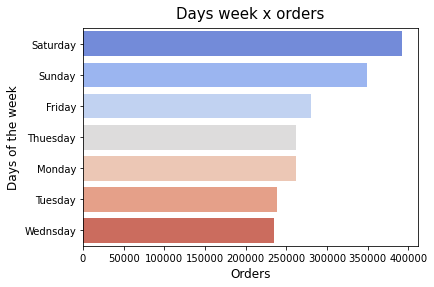

In [13]:
ax = sns.barplot(x=days_count.values, y=days_count.index, palette='coolwarm', data=dados)
plt.xlabel('Orders', size=12)
plt.ylabel('Days of the week', size=12)
plt.title('Days week x orders', fontsize=15, pad=10)
plt.rcParams['figure.figsize'] = (12,12)

**Saturday and sunday are the days with most of orders with almost 400.000.**

In [37]:
dados['order_id'].describe()

count    2.019501e+06
mean     1.707013e+06
std      9.859832e+05
min      1.000000e+01
25%      8.526490e+05
50%      1.705004e+06
75%      2.559031e+06
max      3.421080e+06
Name: order_id, dtype: float64

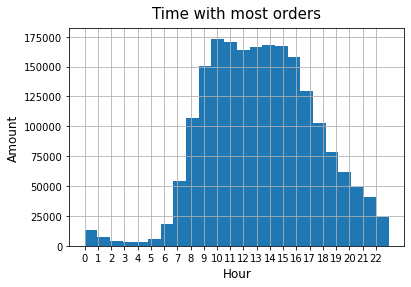

In [55]:
%matplotlib inline
plt.hist(dados['order_hour_of_day'], bins=24)
plt.xlabel('Hour', size = 12)
plt.ylabel('Amount', size = 12)
plt.title('Time with most orders', fontsize=15, pad=10)
plt.grid(True)
plt.rcParams['figure.figsize'] = (10,10)

plt.xticks(range(0, 23))

plt.show()

**The most of ordres happen between 9:30 am and 3:30 pm.**

In [15]:
#Criating a new dataframe with count
hour_day = pd.DataFrame({'count':dados.groupby(['order_hour_of_day', 'days_week']).size()}).reset_index()
hour_day

,order_hour_of_day,days_week,count
0,0,Friday,2126
1,0,Monday,1739
2,0,Saturday,2660
3,0,Sunday,2100
4,0,Thuesday,1977
...,...,...,...
163,23,Saturday,4356
164,23,Sunday,3273
165,23,Thuesday,3266
166,23,Tuesday,3125


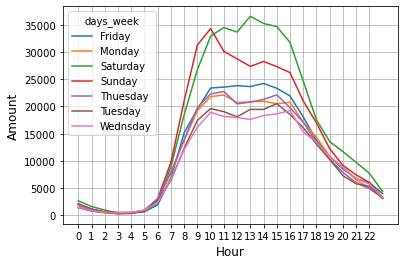

In [57]:
%matplotlib inline
sns.lineplot(data=hour_day, x="order_hour_of_day", y="count", hue = "days_week")
plt.xticks(range(0, 23))
plt.xlabel('Hour', size = 12)
plt.ylabel('Amount', size = 12)
plt.rcParams['figure.figsize'] = (16,16)
plt.grid(True)
plt.show()

**Here we can compare the peak sales times between weekdays and the range of sales during the week. We were able to observe that the pattern is repeated between weekdays and during the weekends, the sales peaks are different**

Text(0.5, 1.0, 'Department with most of orders')

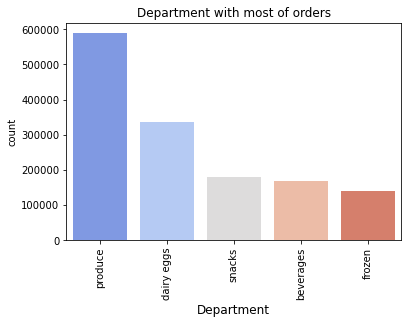

In [56]:
%matplotlib inline
sns.countplot(x=dados['department'],order=dados['department'].value_counts().sort_values(ascending=False).index.to_list()[:5],
             palette='coolwarm')
plt.xlabel('Department', size = 12)
plt.xticks(rotation=90)
plt.title("Department with most of orders")

**The production departments, eggs, snacks, drinks and ice cream sits the most**

In [18]:
#Criação de um novo dataframe para rankear os 5 produtos mais vendidos.
product_name = pd.DataFrame({'count':dados.groupby("product_name").size()}).reset_index()
product_name

,product_name,count
0,air fresheners candles,1258
1,asian foods,10426
2,baby accessories,504
3,baby bath body care,515
4,baby food formula,23355
...,...,...
129,trash bags liners,2020
130,vitamins supplements,2912
131,water seltzer sparkling water,52564
132,white wines,1893


In [19]:
#Rankear os 5 mais
#Separação da categoria 'outros'
no_of_top_categories=5
product_name_cropped=product_name.copy()

product_name_cropped.loc[~(product_name_cropped.product_name.isin(product_name_cropped.nlargest(no_of_top_categories,'count')
                                                                  ['product_name'].tolist())),'product_name']='Other'
product_name_cropped=product_name_cropped.groupby("product_name").sum().reset_index()
product_name_cropped

,product_name,count
0,Other,1319002
1,fresh fruits,226039
2,fresh vegetables,212611
3,packaged cheese,61502
4,packaged vegetables fruits,109596
5,yogurt,90751


Text(0.5, 1.0, 'Share (%) of Records among Different Products')

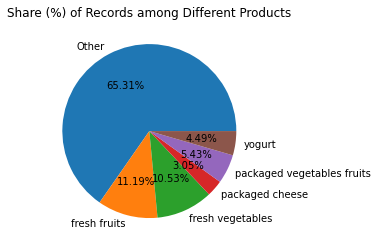

In [58]:
%matplotlib inline
plt.pie(x=product_name_cropped["count"],labels=product_name_cropped["product_name"],autopct="%0.2f%%")
plt.title("Share (%) of Records among Different Products")

**The 5 products with the highest sales are: fresh fruits, fresh vegetables, packaged vegetables fruits, yogurt and packaged cheese**

In [21]:
#Separação da variável que identifica cada pedido.
pedidos = (pd.DataFrame(dados.groupby('order_id').size().values)).describe()
pedidos

,0
count,200000.000000
mean,10.097505
std,7.539068
min,1.000000
25%,5.000000
50%,8.000000
75%,14.000000
max,137.000000


Temos uma média de 10 ítens por pedido e o máximo de 137

In [22]:
print(dados['user_id'].nunique(),('unique users who placed orders'))

105273 unique users who placed orders


In [23]:
x=dados.groupby('user_id').order_id.nunique()>1

print(x.value_counts()[False],'customers did not buy again. Represents', 
      round(x.value_counts()[False] /dados['user_id'].nunique()*100,1), '% in total')

print(x.value_counts()[True], 'customers did not buy again. Represents', 
      round(x.value_counts()[True] /dados['user_id'].nunique()*100,1), '% in total')

57803 customers did not buy again. Represents 54.9 % in total
47470 customers did not buy again. Represents 45.1 % in total


In [25]:
print(
    'Most frequent user = ',
    dados.groupby('user_id').order_id.nunique().nlargest(1).index[0])

print(
    'No Of Orders = ',
    dados.groupby('user_id').order_id.nunique().nlargest(1).values[0])

Most frequent user =  8703
No Of Orders =  15


## Conclusion

* Saturday and Sunday are the days with the highest sales;
* In general, most dos requests occur between 9:30 am and 3:30 pm, but there is a variation on weekends, increasing the time range between 8 am and 5 pm;
* The production departments, eggs, snacks, drinks and ice cream sits the most;
* The 5 products with the highest sales are: fresh fruits, fresh vegetables, packaged vegetables fruits, yogurt and packaged cheese;
* It has an average of 10 products per order with a maximum of 137 products in a single order;
* 54.9% of users did not buy again (57,803);
* 45.1% of users bought again (47,470);
* The user with id 8703 was the most frequent with 15 requests.